# All you need is graph
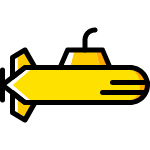

This python notebook contains useful graphs, plots and some pandas tricks for visualizing data.

These examples might come very handy and can save you some time when you are about to plot some data.

Just change the numbers, labeling and title for your case and you got it :)<br>
*Pay attention you will need some .csv files from [all-you-need-is-graph](https://github.com/yotammarton/all-you-need-is-graph) repository to run this notebook yourself.<br>
*Best viewed with Google Colab 


<br><br>
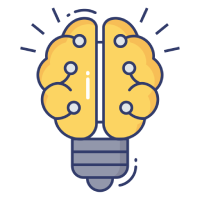

Got any great graph you created and you think that might help others? Got a suggestion?<br>
Please send it to us: yonam92@gmail.com



**Credits:**

[Yotam Martin](https://www.linkedin.com/in/yotam-martin-b41493170/)

[Shoval Zandberg](https://www.linkedin.com/in/shoval-zandberg-2b7264195/)

You?

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot
from plotly.subplots import make_subplots
from datetime import datetime
from scipy.interpolate import interp1d
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

# MAE values by time, with time slider

In [2]:
# dataframe with dates in range
df = pd.DataFrame(pd.date_range(start='1/1/2018', end='1/30/2018'), columns=['time'])

# create MAE column from calculated and true values
df['calculated'] = sorted(range(len(df)), reverse=True)
true = list(range(len(df)))
np.random.shuffle(true)
df['true'] = true
df['method'] = np.random.choice(['a', 'b'], size=len(df))
df['MAE'] = abs(df['calculated'] - df['true'])

# plot data: method 'a' and 'b' lines
fig = px.line(df, x=df.time, y=df.MAE, color='method', title='MAE for methods a and b')

# verticle line on specific date
fig.add_shape(
      dict(
          type="line",
          x0=np.datetime64(datetime(2018,1,6)),
          y0=df['MAE'].min(),
          x1=np.datetime64(datetime(2018,1,6)),
          y1=df['MAE'].max(),
          line=dict(
              color="purple",
              width=2
          )))

# add the time slider
fig.update_xaxes(rangeslider_visible=True)

# save plot as interactive graph .html file
plot(fig, filename='fig.html')

fig.show()

# Horizontal accuracy graphs

In [3]:
width = 0.01
names = ['Base','NSL']
fig = go.Figure()

fig.add_trace(go.Bar(
    y=[width*2, width*4.5],
    x=[80.9, 79.4],
    text=[str(v)+'%' for v in [80.9, 79.4]],
    width=width,
    textposition='auto',
    marker_color='#F4CAE4', # marker color can be a single color value or an iterable
    orientation='h',
    name = 'Original'
))

fig.add_trace(go.Bar(
    y=[width*1, width*3.5],
    x=[68.7, 78.6],
    text=[str(v)+'%' for v in [68.7, 78.6]],
    width=width,
    textposition='auto',
    marker_color='#4AB6EC', # marker color can be a single color value or an iterable
    orientation='h',
    name = 'Perturbed'
))

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [i*10 for i in range(11)],
        ticktext = [i*10 for i in range(11)]
    )
)

fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [width*1.5, width*4],
        ticktext = names,
    )
)


fig.update_layout(width=800, height=300)

fig.update_xaxes(title='Accuracy', title_font=dict(size=14))
fig.update_yaxes(title='Model', title_font=dict(size=14))

fig.update_traces(textposition='inside', textfont_size=18)
# fig.update_yaxes(range=[0, width*5.5])

fig.show()

In [4]:
width = 0.01
names = ['KNN','SVM', 'CRF-RNN']
fig = go.Figure()

fig.add_trace(go.Bar(
    y=[width*2, width*3.25, width*4.5],
    x=[58.5, 66.7, 98.5],
    text=[str(v)+'%' for v in [58.5, 66.7, 98.5]],
    width=width,
    textposition='auto',
    marker_color=['#B3B3B3', '#E5C494', '#66C2A5'], # marker color can be a single color value or an iterable
    orientation='h',
    name = 'Original'
))

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [i*10 for i in range(11)],
        ticktext = [i*10 for i in range(11)]
    )
)

fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [width*2, width*3.25, width*4.5],
        ticktext = names
    )
)


fig.update_layout(width=800, height=300)

fig.update_xaxes(title='Accuracy', title_font=dict(size=14))
fig.update_yaxes(title='Model', title_font=dict(size=14))

fig.update_traces(textposition='inside', textfont_size=18)

fig.show()

In [5]:
width = 0.01
names = ['Inception v3','Xception', 'Inception-<br>ResNet v2']
fig = go.Figure()

fig.add_trace(go.Bar(
    y=[width*2.5, width*5, width*7.5],
    x=[75.2, 82.1, 80.9],
    text=[str(v)+'%' for v in [75.2, 82.1, 80.9]],
    width=width,
    textposition='auto',
    marker_color='#8DA0CB',#'#636EFA', # marker color can be a single color value or an iterable
    orientation='h',
    name = 'Flat'
))

fig.add_trace(go.Bar(
    y=[width*1.5, width*4, width*6.5],
    x=[64.6, 73.7, 72.7],
    text=[str(v)+'%' for v in [64.6, 73.7, 72.7]],
    width=width,
    textposition='auto',
    marker_color='#FDCDAC',#'#FFA15A', # marker color can be a single color value or an iterable
    orientation='h',
    name = 'Hierarchical '
))

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [i*10 for i in range(11)],
        ticktext = [i*10 for i in range(11)]
    )
)

fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [width*2, width*4.5, width*7],
        ticktext = names,
    )
)


fig.update_layout(width=800, height=350)

fig.update_xaxes(title='Accuracy', title_font=dict(size=14))
fig.update_yaxes(title='Model', title_font=dict(size=14))

fig.update_traces(textposition='inside', textfont_size=18)

fig.show()

 # Radial basis function kernel

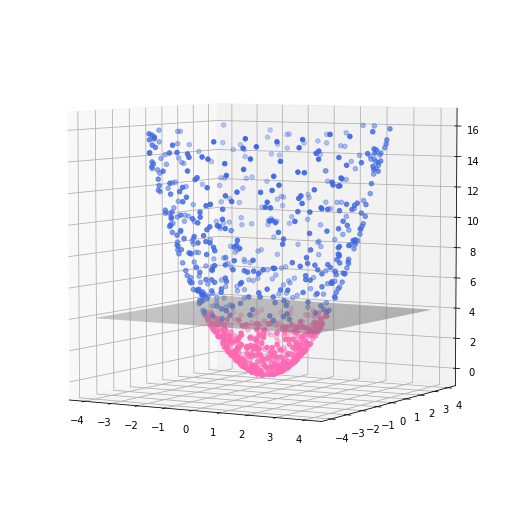

In [6]:
def set_size(w,h, ax=None): # https://stackoverflow.com/a/44971177/13727260
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

# data for plot
x_1 = [-3.149365, 3.53824, 2.199642, 2.25179, -0.5326, 1.99047, 1.196412, 3.811289, 0.702483, -3.857241, 2.124036, -2.619501, -0.258336, 0.119367, 3.444891, 2.588432, -2.22428, 1.008693, 2.758535, -1.706513, -3.141822, 1.88571, 1.255253, -3.501953, -2.389102, 0.083167, -3.15545, -2.99484, 0.570812, -0.293238, -2.376536, -2.14699, 1.926185, -0.260832, 2.338445, -0.177462, -1.850255, -0.060568, -3.672301, -2.759706, 2.747982, -0.479923, 1.371645, 2.65666, -1.239699, -1.902735, 1.10833, -1.286807, -2.731586, 3.120658, 0.10879, -0.765355, -1.744829, 0.675022, 2.068695, 2.89521, -2.607819, -2.873405, -0.465998, -2.188206, 2.510241, -1.4545, 1.623193, 2.169247, 1.607676, -0.200522, 1.719843, -3.242257, 2.394464, -3.324604, 1.947023, 1.578627, 3.003025, -2.594831, 3.033672, -1.01617, 2.93027, -1.412803, 0.388735, -2.228176, 2.889512, -2.263159, 1.222236, -1.899039, 0.864646, 1.466052, 1.018612, -2.760782, 0.36403, -0.937139, -2.955837, -2.495001, 0.35423, 2.045666, 2.925091, 2.558297, 3.09811, -0.045007, -2.865042, -1.731717, -2.75977, 2.877545, 0.210611, 2.21098, 2.917108, 0.700414, 1.881712, -3.085137, 2.259607, -2.881925, -2.280471, 3.633488, 0.547924, 1.044601, -2.147746, 2.51444, -2.596595, -1.214701, -1.076378, -2.68317, 2.530518, 2.445656, -0.07213, 1.37783, -1.304983, 1.553371, -0.434622, -1.406918, 3.239775, -0.485501, -2.239636, 0.703931, 2.212886, 1.30159, -2.818744, -2.510207, 2.240822, 2.130899, -1.907187, -3.77852, -1.01459, 2.776187, -2.444766, 2.120604, -0.226919, -2.379851, -2.239416, 0.488268, -1.485154, -0.493587, 3.252341, -2.212037, -0.568454, 1.608052, -2.864357, -0.815526, 3.555001, -2.476437, -2.718747, 1.592775, 2.483814, -2.478495, -0.371513, 3.40886, 0.32935, 2.937958, 2.193686, 0.119009, 1.577456, 0.405872, 3.154136, -1.434655, -2.602179, -2.132149, -2.150483, 3.252457, 2.285872, 1.768534, 3.753001, 2.363096, 2.066283, 1.676279, 2.656718, 2.820897, 2.275737, 0.39441, -2.520178, -1.480001, 2.95873, -1.97885, 1.861314, -0.419377, 2.280765, 2.331542, 2.59267, 2.606653, -2.462454, -1.241769, -2.597739, 3.486392, 0.335733, -1.227195, -3.122981, -0.541079, -0.317073, -1.883439, 1.264161, -2.161002, -2.24558, -0.976553, -0.124118, -1.252781, -0.64182, 0.359898, 0.361192, 3.576513, 3.191134, -3.171252, -1.896448, 1.802, 3.351651, -0.80684, 0.809255, -1.541785, -0.401938, 2.870585, 1.026069, 1.966255, -1.087492, -0.336376, -0.305756, 2.767548, 3.376738, -2.08202, -2.204059, -2.179284, -1.351542, -1.563048, 1.76867, 1.685847, 2.619311, 3.478884, -0.092339, 3.988863, -1.465597, 3.655156, -2.026402, -1.863758, -1.705269, 3.149327, -1.170222, 1.741872, 0.703957, 2.696103, 1.046084, -1.458738, 0.632329, -1.993829, 2.838239, -0.416953, 2.467508, -2.103713, -0.514322, -1.226384, -0.218296, 0.459362, 2.260838, -2.038797, -2.429749, 2.275962, -1.693137, -0.860541, -3.58669, -2.752112, 2.237429, -2.338184, -1.558331, 3.053719, 1.790612, -1.310667, 3.306674, -1.60035, -3.490676, -3.698569, -3.199091, -2.489668, -0.214173, -2.121177, -0.642228, -2.091178, -0.217466, -0.602664, 0.340474, 2.729705, -2.459519, -1.765837, -0.663324, 3.43479, 2.706686, -2.763282, 1.668256, -3.207712, -1.017829, 0.9061, 2.497756, -1.577931, 1.353562, -3.001019, 0.526067, -2.066616, 2.839576, -2.666659, 0.299125, -1.519578, 0.673671, -2.167808, -0.204759, -2.894987, -1.909881, -1.223407, -1.041723, 2.496493, 2.574788, -0.703271, -1.317821, -0.497305, -1.508865, 0.422253, -2.481288, 2.587706, 0.917113, -1.13145, 0.880117, -0.21364, -3.031148, -0.302733, -0.524098, -1.656694, 0.019869, -2.490719, 2.473152, -2.349971, -1.254723, 0.053493, -0.069278, -2.767528, 1.378125, -2.770806, 1.073724, 0.662312, 0.374411, -3.85377, -0.801096, -3.178644, 3.326914, -1.182204, 0.880874, -1.718164, 1.415369, -1.914309, -3.0957, 3.849685, 3.633329, 0.502318, -2.093005, 0.239533, 0.625504, 2.92319, -2.320403, 2.577975, 1.586288, 1.490727, 1.000346, -1.24081, -1.793574, 2.356424, -3.829054, 3.160751, -3.637269, -2.293006, -1.368391, 1.607325, -1.834554, 0.679146, -2.66829, 2.197083, -3.503968, 1.28218, 0.718863, 3.417844, 2.662983, -1.927093, 2.933303, 2.835815, -2.740463, -0.918135, 1.394814, -2.820444, 0.035442, 2.897454, -1.882556, 1.141612, 0.146754, -2.298912, -1.120367, -1.483474, 1.4931, 0.082257, 3.275064, -2.277651, 3.805705, -3.754685, 1.138179, 1.472549, -1.393179, 0.45294, 2.150949, -1.903926, 0.65778, -0.392333, 2.624602, 2.371996, 1.402806, -3.056727, 2.023613, -1.839396, 0.53278, -2.553852, 2.6296, 3.348507, -0.465365, 2.69202, -3.403419, -2.311286, 2.458552, -2.561831, -2.362003, 1.298998, -0.67381, -1.694904, -1.207964, -1.635189, 2.089842, -0.979272, -3.087684, -1.419353, 2.893741, -2.38955, -3.425803, -1.530789, -2.475459, -3.960001, -0.79253, 3.717031, -2.408851, 3.700454, 2.091953, -2.327977, -0.710142, 1.977457, 2.158135, 3.226655, -0.935978, -3.615286, -0.627029, -3.498415, -2.61757, 2.028707, -2.398365, -0.399124, 1.123204, -2.08196, -1.157083, -2.3015, 1.605266, 2.047573, -2.216748, -2.494915, 3.822628, 3.680024, -3.667259, 0.448968, -3.02547, 2.930386, -2.812069, -2.15081, -3.452628, 3.310395, -2.915167, 1.923485, -0.194136, -2.061886, -0.748123, -2.359587, -2.297435, 2.71585, -2.899167, 2.889256, 2.173985, 2.495124]
y_1 = [0.352043, 1.200942, 1.539173, -3.22731, -2.817721, 1.317619, -1.604219, -0.21207, -2.057372, 0.824533, -2.874075, 1.501236, -2.390208, 3.837211, -2.007973, -2.318558, 2.197294, -2.197661, -2.737328, 3.323393, -1.411452, -2.493296, 3.467416, -0.068658, -1.253526, 3.910705, -0.352068, -0.41378, -2.011119, -2.728358, 1.82054, -1.98762, -2.302727, 3.322278, 1.642952, -2.911219, 3.481544, 3.737307, 0.586655, 1.797734, -0.074703, 2.33626, -1.92185, -0.527666, -3.68956, -2.376688, 2.113221, -2.555743, -2.540126, -2.151179, -3.787739, 3.041377, 1.950308, -2.260522, -0.924356, -2.01409, -0.065491, -1.190846, 2.165473, -3.268535, -0.813644, -3.538465, -1.535719, 3.358679, -1.652441, -2.947201, -2.746555, -0.41191, -0.598578, -0.00258, 1.111535, -1.250088, 1.168955, 1.653698, -1.399481, 2.18214, -1.639976, 2.777588, 2.262448, 0.921196, -1.181917, -0.256044, -3.501708, -0.667882, 3.83416, -3.501926, -2.129944, 2.57627, -3.327849, -2.908938, 1.400812, -1.38354, -2.682928, -0.396185, 0.632331, 0.500924, -2.266529, -3.389691, 0.19735, 2.728892, -0.970629, 0.698536, 3.585796, -1.328218, -0.405912, 3.754548, 1.419845, -0.941935, 2.95602, 1.901048, -1.655899, 0.536797, -2.490878, 2.723806, 1.405929, -0.170475, -0.05762, 2.211934, -3.364934, -1.054875, -2.348064, -2.257419, 2.188044, 2.154401, -2.027968, -2.247808, -2.497132, 2.066229, 0.453683, -3.57722, -0.633058, -3.349395, 0.57047, 1.684006, -1.329453, -2.471759, 2.483491, 1.423977, 1.851542, 0.69827, -2.442354, -0.313514, 0.684387, 0.02143, -2.127868, -0.763759, 1.355582, 2.784559, -1.676567, -1.939644, -1.456828, 0.05196, -2.122406, -3.120095, -1.957807, -2.877037, -1.129986, 0.761271, 1.022609, -2.215588, -1.039412, 2.8461, 2.048939, -1.224307, 3.045057, -1.606073, -1.653107, -2.757441, -1.391646, 3.271248, -0.606059, 1.943562, 2.792258, 0.459447, 2.795336, -1.516909, -1.171682, 2.734167, -1.283859, 1.690117, -1.24033, 2.529294, -0.695843, -0.249964, 0.966074, -3.910881, 0.914528, 2.717049, 0.42697, -3.082601, -2.63397, 2.320935, 0.556114, -2.240744, 1.423147, -0.038426, 0.666044, 3.706322, 2.070137, -1.508252, 2.851284, -1.996833, 0.045587, -2.505353, 3.349854, 1.340783, -2.119291, 1.6954, -0.593162, -3.303203, -2.06638, -3.259142, -2.327259, 3.47891, -2.232919, 1.497693, -0.916932, 1.853963, 3.386361, -2.84417, -0.220874, 2.958707, -2.557344, 1.819287, -2.12168, -2.71502, 1.991253, 0.662344, -3.676374, -3.119776, -2.984553, -2.422766, -0.080411, -1.478599, -3.172178, -1.108297, -1.964671, 3.486404, -1.695215, -3.512074, 2.466493, 0.680916, -3.804503, -0.210494, 2.67561, 1.393692, 0.749054, 0.856844, -1.346107, -0.317228, -2.005075, -2.943135, -2.867893, -1.938861, -2.622232, 3.428698, 3.172501, -1.705694, -0.341857, -2.662098, 2.792853, 0.981058, -3.030998, 2.645699, 3.848533, 2.69195, -3.025708, -2.505634, 2.80764, -0.698231, -3.13228, -3.123208, 0.767526, 0.324191, -1.37885, 2.497949, -1.29538, -0.721891, -2.708518, 3.678802, -0.308195, 2.240506, -1.014847, -0.470625, 0.724007, -3.092029, 2.142669, 1.781169, -3.771996, -1.086946, -3.368324, -3.750338, -3.140499, 1.545306, -2.604959, -2.975766, -3.132882, 1.225924, 0.598219, -0.124929, -2.931796, 1.324283, 2.518266, 2.37931, -1.531761, -2.673364, 2.16245, -0.863309, -3.433699, -2.462123, 2.477841, -1.857501, -3.236437, 2.315957, 2.110612, 2.14914, -3.163128, 2.010168, 0.672714, 2.835163, -2.104531, -0.118243, -1.740421, 3.768251, 3.039894, -3.271236, -1.611761, 2.409025, -2.154827, 2.656788, -3.387939, 3.136041, 3.181082, -2.443206, 2.354752, 2.404793, -3.218641, 1.733128, -2.598144, -0.069512, -1.207216, 2.291077, -1.86829, -2.219279, -3.54148, -2.616872, -1.816052, 0.195012, 3.125328, -3.696106, 2.858484, -0.330207, 2.419538, 0.171766, -1.242581, -3.186259, 3.71228, 3.032389, 2.835847, -1.603452, 2.512005, 0.146098, 0.831806, -2.482569, -0.561897, 3.583923, -2.921292, 1.017301, 1.351065, -2.223627, 3.669451, 1.924794, -2.503412, 3.579399, 0.912387, -1.469938, 0.94352, -2.209358, 1.197045, -0.822859, -2.517341, 3.383541, -2.228527, -2.962561, -0.087124, 3.032037, 0.107078, -2.390929, -2.601168, -1.173223, 2.149518, 2.376902, 0.179964, -0.27701, 1.441162, -1.805937, 2.634988, -2.55368, -2.557627, -0.445878, 1.837942, -1.735501, -3.173833, 1.628425, 3.049488, -2.632684, 3.304122, -3.183615, 0.699248, -0.201437, 0.286758, -0.122854, 3.333034, -1.442483, -1.932525, -2.776665, 1.515701, -2.674949, -3.595781, 2.810709, 1.663148, -1.569432, -3.701863, 0.565015, 0.399235, 1.297097, -2.918643, -2.973896, -2.581534, -1.187015, -2.975916, 1.392372, 0.610727, -2.006133, 1.842959, 0.473741, 0.268917, -3.660169, 2.476253, 1.501951, 3.114879, 1.381496, 1.706427, -2.069544, -1.972595, -2.940114, 2.442007, 1.797635, -0.47336, -1.403065, 1.838205, -0.177017, -2.433079, -0.451013, -0.11318, 1.518059, 1.47158, 1.351045, 2.081783, -2.328853, 1.989565, 2.07534, 2.274231, 0.679986, 2.242164, -0.861757, -2.635385, -3.03569, -3.048757, -3.605139, -2.417173, 0.357104, -2.03343, -3.224948, -1.860001, -1.899878, 0.336208, -1.866903, 0.362185, 0.403873, -0.185621, 1.975604, -2.095585, 0.282717, 2.11894, -3.310351, 1.506253, -0.6697, 0.250758, -2.956114, 3.108405, 0.085965, -3.604735, 1.281329, 2.659088, 2.43539, 0.16858, 2.280629, -0.265782, -0.181465]
z_1 = [10.042434177074, 13.961403984964, 7.2074784520929995, 15.486088040200002, 8.223214393841001, 5.698090650061, 4.004920273705, 14.570897526421, 4.726261911673, 15.55816280017, 12.771836034920998, 9.115495016697, 5.77983177216, 14.73843673921, 15.89922957061, 12.075691417988, 9.775522440836, 5.84717543917, 15.102479925809002, 13.957127651617999, 11.863242227988, 9.772427147716, 13.598633811065001, 12.268388735173, 7.27913579908, 15.300530346914, 10.080816579124, 9.140280514, 4.370425971505, 7.529925900808, 8.962289250896001, 8.560199324500001, 9.012740290754, 11.105564441507997, 8.167616292329, 8.506688827405, 15.544592188961, 13.971132094873001, 13.829958723626, 10.847824741192, 7.556985610532999, 5.688436873528999, 5.5749174285250005, 7.336273763156, 15.149706604201, 9.269046329569, 5.694098383740999, 8.187694537298, 13.913802171272, 14.366077443005, 14.358801996221002, 9.835742332154002, 6.8481295341049995, 5.565614412967999, 5.1339330177610005, 12.438799472200001, 6.805009007842, 9.674570489741, 4.906427449733, 15.471566544661002, 6.963326436817001, 14.636304806224999, 4.993188362210001, 15.986357172049999, 5.315183379457, 8.726202806885, 10.501424312673999, 10.681900302149, 6.091753469380001, 11.052998413215999, 5.026408618753999, 4.054783212873, 10.384614942650002, 9.467864993765, 11.161712872945001, 5.7943364485, 11.276003553476002, 9.711007414553, 5.269785852929, 5.8133703573919995, 9.746207393033, 5.187447189217, 13.755819756959998, 4.052415489445, 15.448395610915998, 14.41279417618, 5.57423184968, 14.259084364423998, 11.207096807701001, 9.340149793165, 10.699246629912999, 8.139212921600999, 7.323581546084, 4.341711937781001, 8.955999851842, 6.795808393985, 14.735439279940998, 11.492030705529999, 8.247412684263999, 10.445695315753001, 8.558451108541, 8.768217770321, 12.902289946937001, 6.6525956159240005, 8.674283635407999, 14.587210455700001, 5.556799874969, 10.405311852994, 13.843878034849, 11.919475203928998, 7.9425494800420005, 13.490386065352999, 6.504693920659999, 8.510310374837001, 6.5894492335570005, 6.351470239225, 6.745625658425001, 6.368150539757, 12.481370423239998, 8.312162514525, 11.916925896419999, 11.077173811897001, 4.792739282836001, 6.5398591777010004, 5.815634839313, 7.465602268505, 6.424564508308001, 6.248720539164999, 10.701970315113998, 13.032214149401002, 5.41673184386, 11.713965718786, 5.222300469896, 4.530012736135999, 9.712763016745, 12.41073173693, 11.189010782765, 6.568441044729999, 7.065570030732999, 14.764794383299998, 6.994485929416, 7.805505287165001, 6.445266360525, 4.497420569716001, 4.579314457984999, 6.247018592282, 6.85258657978, 7.992174464304999, 5.016559309205, 4.005846973305, 12.700069801865, 4.895807530969, 4.8277471789519995, 12.320824043729, 12.037549272698, 8.942424556045001, 13.914900470196999, 6.7122737504100005, 8.43731441689, 7.445762386369, 7.249709292340001, 14.243222675024999, 4.3361729348899996, 13.119254129848999, 9.380843555749, 11.211067691093001, 7.5450210200450005, 7.6176440105620005, 4.425046021252, 10.865795557888001, 10.315881417977, 5.835668216869, 14.568040286605, 4.75715090401, 12.438480486185, 12.879489451130002, 6.598049509508, 10.603381693045, 15.733310437881999, 8.440718178905001, 5.807943944988999, 9.207239424277, 7.542348012173, 8.019941885905, 6.112277866645, 15.450549444260998, 7.187658614468, 9.572758228401998, 8.936386593800002, 13.418276247701, 10.402287767496, 5.562616342354, 5.511151766221, 10.457021771299999, 8.747285112509001, 6.796116419885, 6.507294312052, 15.278813017045, 11.033715110889998, 14.429753273168, 8.242537095945002, 5.493349597914, 9.755088500929999, 6.569560138849999, 11.322057108645001, 5.3450415198100005, 6.089497376602001, 7.544310804003999, 5.394470694643999, 11.864805821017999, 4.285331582324, 12.191466810125, 5.828067365481001, 12.232341358504, 5.116386921425, 15.034529561418, 11.02410049858, 13.494018052872999, 15.063955839025, 11.3365069889, 11.282349749677, 9.404937897448999, 7.194901989361, 5.686906174594, 4.663080178244, 15.611591842625002, 5.01790610277, 4.304858299361, 14.698364637940001, 9.846151103552, 9.001043341345, 13.529117023060001, 11.408825449564999, 6.521062283200999, 14.920589339165002, 5.977600992865, 5.686597916005001, 14.598131901519999, 6.001947465124999, 15.176743888885001, 12.944377833770002, 12.566280484512, 14.48276956793, 15.955335756804999, 9.306863438509, 15.3025427752, 4.66738696052, 4.2077755229000005, 4.719946417809999, 10.018894156913001, 5.389745284909001, 11.696161692609, 8.720365717298002, 11.028153363929999, 7.9703923968799995, 13.883886527847999, 10.464602559242, 6.884746102877001, 8.172466829570002, 7.260615565813, 13.888623609673001, 5.388083185733, 9.451475995688, 8.503740914057, 14.858859395705002, 7.457608249543999, 14.266297363507999, 10.434894949165002, 13.786522572601001, 5.667529554804999, 12.677890899169, 10.494959023944999, 13.453441316775999, 7.679220265024999, 6.907315852541, 11.706853624457, 4.106404849961, 9.846326346842, 10.542361090868, 15.251432140093, 11.029077100301, 7.580987258536, 13.214733370385002, 13.900900538385999, 10.75836936233, 15.759090087065001, 4.63690051749, 7.67195487189, 14.640410628000001, 5.554477034600001, 11.392898030131999, 14.42823901114, 9.978656513677, 9.839260020661001, 12.835045103041999, 11.973363597325001, 10.2549483549, 13.300671997876, 7.684015074556999, 7.651334666564999, 11.378505867152, 12.043141739033, 7.377639519997, 6.482133286099999, 8.585076796656999, 9.636741317256998, 6.508320090344001, 9.751417467842, 12.067035311089999, 10.332951358585, 14.202887881057002, 10.561380187282001, 10.564000220594, 7.672774123933001, 4.908515630785001, 9.318194264464001, 10.047304992465, 12.421725118393, 4.100189559957, 9.534873924218, 5.514237538690001, 6.246458706098, 9.658598502185, 14.694305698442, 10.977607719276998, 10.948297230721, 4.874447109345999, 5.981699046634001, 10.800069538873, 13.75474481938, 12.31922692249, 11.114932256181001, 10.893888624412998, 6.014897608036, 14.732715179408, 5.874676642138001, 10.634328600485, 5.748367674020001, 6.750747021896999, 6.208513055105, 7.573851285759999, 10.77139752077, 5.0648373308290005, 4.928060780889999, 12.546880031684, 14.507230295168, 5.1972733823290005, 7.715395569779999, 10.920558335760001, 14.09985674858, 8.311114375176999, 14.960579875749, 6.495918934660001, 10.133281237491998, 12.612364304957, 11.549852712697, 14.556961802276, 12.147470578216998, 10.04529761357, 6.235637263785, 15.893527610025, 14.841419224829, 13.892980843876998, 6.415472212884999, 4.6963981686339995, 12.901880128018, 8.925202203280001, 9.579941100701, 7.209646716634001, 11.590472135754, 15.981180260344999, 5.927098930964999, 7.2677637614599995, 14.351706657301001, 4.049357731245, 7.71345179162, 15.551884525316002, 14.871609656164999, 14.662642510385998, 5.934973449917, 8.209499639162, 14.031843354306002, 8.331920968645, 9.238006968037, 7.127362115475999, 14.020422078258001, 12.289257443108001, 7.360527035441, 7.282838976993, 13.058109816065002, 11.711906090613002, 9.363350548252999, 8.636653531104999, 8.118581254325, 9.587085364613001, 4.104380326194, 8.88866785474, 14.476185899536, 6.542712006493, 8.594046873000002, 6.9220478885, 4.315241679545, 10.094752648405, 7.936764364369001, 10.554599276833002, 9.131720152531999, 13.146569800884002, 10.142170682274001, 11.2149919696, 5.228270942770001, 14.565620697589, 14.112752554540998, 12.404567081197001, 4.24915776269, 5.675600601666, 7.915023165825, 6.923931122002001, 10.780286366077, 13.362315528361, 8.05401026557, 9.654596928307999, 8.08948182664, 15.671654344404999, 9.662821902754, 4.254398158994, 5.065838272225, 8.802331489849, 15.366217456720001, 13.579113953156, 12.621503739274, 9.072640622281, 9.185671466784, 11.95624835809, 9.366612587485001, 9.440975812385, 6.787408607642001, 5.651374524898, 15.084232912564998, 6.585848836108999, 5.128556375617, 11.161648209937, 4.582374263737, 7.279332691293, 5.24198601792, 13.424923517880998, 10.658833271605, 14.33713516313, 8.941440795724999, 11.960195884409002, 4.311906356745999, 9.506894882706, 15.712942938290002, 6.547977221141001, 14.019732181130001, 5.815372852601, 15.997862933597002, 6.541815050609001, 7.244799504554002, 4.838122119253001, 9.333892482458, 8.615915567450001, 14.718338604625002, 6.048181457845, 13.532673821992002, 5.420464769736999, 12.981532639273999, 13.796926803125, 13.331065867949, 15.047073918274002, 13.156327176697, 7.104312537545, 4.462080708416, 5.473678633789001, 15.697191852703998, 6.036482650757, 7.802091605212999, 5.027007514767999, 9.709927668634002, 14.743662800609, 13.705690040704999, 13.483243728722, 4.10458342984, 13.544945213124999, 8.667091011084999, 12.397638784361, 15.584407399301, 14.189438206393, 11.407213146025, 8.561078212453, 12.438404526221, 9.699870430520999, 4.258763858220999, 13.553802443354, 7.209454816809998, 12.348956570969001, 13.3069656746, 8.433588510288999, 13.549068869176999, 4.796850851749, 6.258573321601]
x_2 = [-1.121368, 1.621833, -0.416406, -1.004569, -0.610744, -1.444067, 0.266789, 0.665632, -0.879249, 0.728805, 0.16734, 0.490516, -0.63146, -0.136697, 0.796904, 0.806395, -0.568806, 0.266662, 1.026384, -0.767948, 0.138796, 0.591555, 0.64355, 1.325111, -0.905887, 1.133787, 1.573509, -0.118622, -0.169407, -1.116825, -1.349592, 0.553722, -0.824605, -0.529855, 1.34758, 1.747708, 1.668356, 1.576108, -1.522539, -1.206106, 0.982875, -0.051252, 0.59113, 0.548315, -1.300218, 0.100665, 0.546502, 0.044522, -0.479283, -0.197126, 0.488169, -1.041664, 0.776705, -0.071783, -0.201163, 0.144118, 0.166003, 0.449822, -1.190776, -1.202917, -1.330375, -0.547156, -1.095555, 1.054492, -1.511835, -0.892937, 1.853842, 1.364096, -0.453153, -1.648956, -0.442658, -1.691111, -1.757079, 1.239688, 0.365286, -0.355097, 1.384989, 1.29082, 1.442556, -0.920334, 0.675309, -0.668659, -1.007046, 1.240995, -1.463112, 1.783128, 0.600342, 0.288534, -1.014804, 0.214526, 0.701134, 0.57396, -0.809808, -0.662429, 0.073842, 0.352399, 0.40407, 1.931689, 0.35175, -0.041548, -0.902518, -0.474858, -0.797801, -0.154466, -0.031836, -0.278839, -1.648205, 1.110681, -1.635021, -0.169446, -1.325427, -0.413846, -1.263847, 0.918689, -0.727843, 0.299383, 0.458335, 0.84213, -0.668905, -0.094541, -0.848904, -0.12816, 1.113172, 1.357933, 0.909555, 0.613024, 1.801172, -0.920504, -0.940766, 1.539188, -0.332057, -1.557755, -0.318286, -0.393882, -0.502385, 0.703756, -0.438872, 1.178637, 0.600053, 0.607179, 1.119345, 1.264853, 0.623468, -0.972331, 0.10635, 0.116791, 0.432874, -0.018611, 1.569577, 0.760423, -0.017577, 0.91516, 1.432636, -1.71964, -1.907153, -0.573577, 0.892244, -0.300574, -0.600437, -0.803822, 1.678988, 0.88043, 1.659655, -1.175305, -0.472896, -0.635406, -1.706853, -1.534088, 0.896845, -1.071255, 1.933555, 0.914263, -1.319484, 0.093651, -1.922676, -0.702817, -0.215139, -0.687992, -0.072366, -1.51412, -1.403512, 1.164388, -0.324196, 1.259902, -0.339547, 0.605443, -1.141104, -0.515839, 0.569841, 1.979916, -0.198674, -0.520758, 1.357148, -1.538743, -0.703192, -0.414882, 1.758489, -0.787893, -0.794975, -1.361421, 1.427298, -0.924568, -0.260511, -0.99802, -1.871164, 1.072798, -0.675416, -0.175407, -0.890557, 0.669357, 1.006856, 1.153527, -1.096248, 1.051019, 0.199299, 0.692459, 1.717453, 0.331196, -1.251585, -1.115444, 0.756176, -1.130998, -1.435071, -1.119924, -1.071658, -1.397208, 1.051742, 0.318109, -1.01517, -0.168192, 0.707197, -1.255781, -0.367101, 1.535819, -0.479417, 1.651134, -0.730679, -0.609586, 0.101072, 0.480381, 0.53516, 1.758284, -0.391637, 0.78308, -1.22666, -0.114317, -0.055213, -0.148335, 0.656186, 0.878897, 0.643894, 0.928695, 0.782721, 0.816345, 0.188584, -0.648185, 0.614207, -0.248637, 0.434227, 0.725995, 1.771658, -0.400591, -1.552996, -1.236756, -0.570858, -0.434442, 0.120809, 0.291316, -0.823333, 1.637168, 1.317623, 1.417439, -0.418562, 1.375572, 0.981109, 0.8292, 0.963138, 0.066356, 1.785766, 0.819757, -0.008398, -0.034377, -0.64863, -0.335288, -0.967648, 1.669758, -1.640253, 0.550134, 1.866156, 0.646085, -1.69202, -0.448045, -0.63286, -0.392841, -1.802945, 0.09337, 0.377752, 1.366245, 1.773353, -1.122201, -0.700983, 1.768266, -1.272476, 1.451606, 1.500827, 0.914416, -1.475141, 1.047012, 0.378029, 0.802358, 0.457342, 1.062412, 1.678501, -1.702735, -0.095132, 1.011781, -1.343369, -0.934004, 1.105845, -0.645322, 1.89892, 1.503926, 0.710357, -1.385677, -0.025631, 0.193004, 0.23719, 0.340128, 0.301652, -0.442577, -0.814325, -0.208602, 1.11568, -1.056271, 0.849365, 1.576472, 0.028067, -1.502261, -1.474341, 1.418125, -0.399682, -1.763178, -0.501778, -1.277736, -0.92311, 0.817568, -0.100011, 1.363021, -1.46963, 0.11037, -0.847914, -0.695355, 1.478322, 1.912277, 0.520119, -0.669553, -0.333826, -1.365256, -0.865179, 0.073476, -0.226786, -1.140204, -0.540456, 0.25558, 0.218913, 0.86377, -1.3668, 0.70932, -0.427329, 0.394609, 0.115696, -0.644683, -1.550171, 1.417877, 0.743528, -1.861753, 1.556863, -0.322758, 1.796903, 0.18487, -0.114438, 0.124029, -0.402896, -1.456994, 0.487764, 0.992826, 1.247984, 0.955577, -0.550449, -0.417833, -1.051597, 1.71518, -0.591608, 0.541736, -0.755421, 0.79535, -1.74787, -0.214264, -1.368701, 0.77467, 1.724222, 0.570929, 1.544353, 0.357283, 1.335867, 0.025365, 0.279281, 1.319638, 1.59762, 0.837685, -0.48764, 0.365806, -0.119526, -0.985416, -0.301928, 1.013699, -1.303805, 0.866912, -1.249766, -0.276551, -1.41544, 0.846604, -1.544294, 1.496015, -0.412931, -0.149551, 1.430579, -1.581733, 0.936415, 0.897011, 0.435995, -0.318616, -1.091282, -0.896272, 1.59509, -1.47882, -0.043817, 0.153742, -0.733267, -0.970194, 0.537977, -1.020531, 0.675965, 1.041783, -1.970827, 0.544991, 0.760545, -1.851639, -1.720071, -0.292228, 0.469993, -1.077898, 0.041812, -0.840695, 0.546032, -1.631933, -0.791791, 1.16831, -0.527703, -0.296799, 1.492535, -0.942275, 0.420007, -0.318617, 1.720225, -1.263693, -0.551219, -0.499592, 0.412904, 1.310244, -1.187963, 1.234228, -1.592279, -0.716695, 0.936425, 0.449095, 0.734658, 1.722772, 0.021439, 0.277568, 0.913799, 0.360868, -0.9083, -0.164255, 1.771232, 0.275593, -1.950631, 1.465842, 1.259977, -1.734165, -0.962655, 1.164691, 0.297782, -0.886345, 0.536222, -0.532538, 1.087777, 0.439112, -0.0746, -0.183573]
y_2 = [0.901347, -0.851218, 1.542443, -0.173125, -1.602531, 0.459348, 0.098651, -1.42208, -1.216994, 0.491896, -0.629113, -0.993429, -0.448302, 0.909347, 1.52935, -1.09868, -1.846417, 1.48656, 0.269993, -0.00104, -0.816711, 0.445391, 0.743984, -0.417001, -0.250799, 1.101152, -0.422773, -0.542524, 1.533889, -0.442593, -1.452183, 0.934249, 0.529119, 0.150439, 1.207545, -0.637836, 0.076162, -1.101964, -0.124441, -0.528781, 0.793548, -0.099586, -0.562967, -0.677595, -0.163224, -0.733797, 0.825995, -1.304211, -0.074924, 0.471935, 1.433145, -0.0159, -1.501023, -0.083839, -0.624609, -1.475045, -1.232305, 0.987076, -0.098057, 0.477329, -1.168696, -0.709845, -1.540365, -0.929497, -0.175409, -0.170065, 0.153535, 1.043619, 0.125396, 0.029941, 0.968673, -0.315904, 0.138523, -0.042051, 1.23178, -0.565503, 0.369801, -1.006724, -0.586959, 0.079589, -1.607808, -1.352381, 0.982555, 1.072183, 0.313712, 0.498181, -0.632091, -1.48299, 1.337967, -1.294891, -0.645101, 1.81581, 0.35232, -0.350049, -1.231988, 1.395432, 0.204623, 0.491134, 1.573921, -0.205074, 0.969055, -1.823585, -1.712135, -0.57414, -0.811451, -1.976471, -0.589848, -0.573185, 0.20362, 1.48663, -1.245899, 0.1061, 0.999335, 0.616915, -1.035238, 0.824504, -1.390571, -1.597699, -0.73358, -0.387085, 1.13376, -1.611469, -1.606049, -0.230019, 1.349253, 0.066938, 0.406523, 1.495667, 1.499849, 0.871658, 1.654184, 1.052988, -0.36909, 0.865979, -1.492528, 0.856788, -0.36933, 0.393901, -0.055089, -1.013913, 0.079644, 1.044216, 0.653477, -1.097108, 0.703878, -0.908765, -1.019668, 1.224307, -0.212883, -1.783204, -0.746487, 0.958143, -0.385116, 0.411623, -0.416399, -0.945446, -0.289286, 0.548895, 1.380708, -0.040413, 0.552078, -1.614136, 0.786962, 0.222043, 1.667626, 0.273426, -0.473432, -1.251194, -0.989945, -0.045598, 0.203342, -0.260219, 1.326848, -1.721233, -0.226793, -0.22967, 0.101745, 0.729831, 1.154171, -0.374475, -0.296412, 0.498606, 0.779443, 0.699631, -0.340637, 0.47239, -0.472496, 0.090131, 1.286013, 0.037458, 1.201346, 1.611898, -0.908937, 0.357151, -0.944888, 0.560146, -0.867351, -1.826008, -1.030084, 0.17331, 0.232288, -0.016846, 0.825437, -0.347101, -0.286596, 1.138405, -1.047024, -1.425549, 0.925705, 1.098436, 0.262995, 0.556925, 0.151953, 1.449106, -0.673373, -0.474717, 0.44947, -1.390388, 0.296429, -0.773033, -0.00077, 1.227427, -0.238529, -0.162798, -0.428624, -0.386327, -1.117177, -1.215208, -1.381623, 1.896654, 1.013606, -0.329806, -1.306678, 1.182936, -0.711566, -0.405793, 0.252104, 0.995607, -1.759103, -1.072513, 0.122975, 0.883532, -1.07594, 0.727946, -1.363073, 0.762022, 1.492582, -0.43446, -1.717643, -0.045673, -0.368479, 0.081145, 0.775009, 0.456841, 0.824236, 0.759366, 1.565078, -1.398221, -0.823172, 1.840956, -0.430719, 0.866406, -0.566389, 0.318555, -1.090715, -1.631784, 0.687023, -0.036379, 0.050311, -0.913689, 0.127789, -0.307685, -0.683618, -0.295831, 0.204818, 0.434232, 1.462793, -0.743477, 0.330521, 0.425191, 0.809526, -1.518712, -1.670837, -0.692884, 0.181354, -0.080097, 0.515484, -0.085192, 0.18599, 0.290987, -0.270204, -1.576107, 0.238511, -0.758818, -0.051439, 0.945854, 0.794611, -1.189643, -0.29253, 0.960348, -0.119022, -0.4634, 1.364294, -1.199614, 0.026921, 0.783991, -0.402154, 1.669344, 0.483095, -1.555682, 0.193821, 0.11527, -0.320872, -0.411915, -0.519567, 1.652794, -1.401999, -0.659347, 0.552219, 0.064742, -0.235412, 0.031126, 0.106263, 0.201283, -1.667569, 0.904339, 0.780092, 1.047797, 0.225923, -1.240354, 1.248014, 0.734729, 0.061729, -1.240284, 0.213427, -0.775519, 0.150311, 0.058966, -1.207654, 0.745462, 0.174493, -0.306888, 1.850702, -0.368768, -1.485909, 0.689608, 1.600932, -1.29408, -0.55182, -0.560117, 0.107389, -1.474436, 0.841037, -0.107892, -1.338063, -1.567828, -0.032718, 0.947054, -0.494994, 1.570577, -1.568641, 0.035051, -0.763378, -0.295043, -1.894546, 1.374653, 0.05212, -1.815551, -1.506501, -1.442084, 0.132631, -1.838789, 0.403367, -0.517968, 0.213432, 0.629309, -0.908239, 1.338949, 0.046743, -1.448946, -1.590446, -1.438921, -0.655877, -1.087356, -1.186071, 0.555609, 0.480083, -0.739302, -1.146597, 1.402969, 0.61437, -0.182988, -0.244854, -1.535497, -0.26622, -0.955358, 0.014887, -0.225603, 0.517183, -0.233102, -0.198382, 0.650347, 1.242497, 1.751682, 0.534156, -0.918312, -1.035013, -0.56614, 0.771957, -0.243907, 0.514803, -1.88726, 0.172095, -0.187542, -0.018562, -0.028646, -1.130572, -0.845225, 1.221125, -1.082369, 0.092659, 1.689544, -0.602914, 0.757627, 0.136034, -0.32515, -0.790152, -0.500861, 0.687093, -1.160925, 1.851027, -0.382296, 1.619219, 0.181391, -0.494332, 0.226137, 1.622759, -1.99348, 0.986045, 1.055239, -1.552131, 1.013821, 0.217732, -1.642814, -0.196117, 0.54441, -1.261355, 0.088659, -0.667399, 1.586571, -0.377473, -1.222785, 1.147336, -1.069233, 1.586247, 0.792121, 1.51449, -1.333624, -0.681026, 0.007515, -0.041114, -0.822635, -0.013486, 0.969763, -0.776031, 1.130342, 1.633699, -1.73891, -0.725396, -0.785795, 1.504438, 0.909459, 0.161366, 1.3679, 1.34623, 0.642063, -0.407478, 0.076886, -0.921383, 0.041585, -0.487033, -1.640286, 0.783117, 0.486785, 0.857799, -0.306661, -0.16482, -0.313809, 1.080447, 0.855975, 1.284131, -0.567937, 0.502393, -0.96053, 0.256907, -1.584862, 1.386078, -1.280108, 0.733324, 1.973032]
z_2 = [2.0698926058329996, 3.354914363413, 2.552524365085, 1.0391311413860003, 2.9411138394969996, 2.2963300855929996, 0.08090839032199999, 2.4653774858240003, 2.254153200037, 0.7731184028410001, 0.423785842369, 1.227507124297, 0.599716414804, 0.845598036218, 2.9739674077159997, 1.8573706384250002, 3.7327960035250003, 2.2809692558440005, 1.1263603355049998, 0.5897452123039999, 0.6862811871369999, 0.548310460906, 0.9676687947559999, 1.9298089963219998, 0.8835313951699999, 2.498008688473, 2.65466758261, 0.30840346946, 2.38151419597, 1.4431866442739998, 3.930234031953, 1.179429247285, 0.959940322186, 0.30337821374599994, 3.274136783425, 3.4613180161600003, 2.7892123929799997, 3.69844108496, 2.3336105690020004, 1.7343010291969998, 1.595761693929, 0.0125441389, 0.6663665199890001, 0.7597843232499999, 1.7172089217000004, 0.5485914794340001, 0.9809321760290001, 1.702948541005, 0.23532579986500002, 0.261581304101, 2.292213563586, 1.085316698896, 2.856340703554, 0.012181777009999999, 0.43060295545, 2.196527749949, 1.546132609034, 1.17665886146, 1.427562657425, 1.67485228313, 3.135747981041, 0.8032596123609999, 3.57296509125, 1.9759180510730001, 2.3164133845059998, 0.8262585901939999, 3.4603031571889997, 2.949898514377, 0.22107179822499998, 2.7199523534170003, 1.134273485893, 2.9596517515369998, 3.10651523377, 1.5385946239449997, 1.6507158301960003, 0.445887522418, 2.0549473097220003, 2.679709484576, 2.4254886808169998, 0.853349080477, 3.041088810345, 2.2760392274420003, 1.9795559741410003, 2.6896449755140006, 2.239111943488, 3.4277297731450003, 0.759949549245, 2.282511209256, 2.819982851505, 1.7227641065569999, 0.9077441861570001, 3.6265960376999997, 0.779918379264, 0.561346482442, 1.5232470731080003, 2.071415521825, 0.205143137029, 3.972634998677, 2.6009553767409996, 0.04378158178, 1.753606333349, 3.5509523723889997, 3.567892693826, 0.353496484756, 0.6594662562970001, 3.9841888017620004, 3.0645003851289996, 1.5621533279859998, 2.7147547748410004, 2.238780703816, 3.30902105053, 0.18252572171599998, 2.5959796816339997, 1.224573595946, 1.601473149293, 0.769437026705, 2.143758678266, 3.261825031501, 0.9855735154249999, 0.15877279790600002, 2.0060497388160003, 2.613257323561, 3.818545291985, 1.8968907728500002, 2.647773956034, 0.38027912042, 3.409481523113, 3.084347388905, 3.1345876895569997, 3.128887368308, 2.8465865571050006, 3.5353843681690003, 0.237533405896, 0.9050626583650001, 2.4800305190090004, 1.2293581844800001, 0.329013281284, 1.54434317557, 0.36309840072999994, 1.3966859096100002, 1.2592763957610003, 2.690240166265, 0.815744536553, 2.149073537225, 0.506754561384, 0.8394939629060001, 1.2271027301, 1.49927399957, 2.508891130618, 3.758059644545, 0.557551792098, 1.7555558340489998, 2.200760241952, 3.1265952237290002, 3.8106206926100006, 1.222858713845, 0.879785745332, 0.391630450501, 2.266879172233, 0.6477630182530001, 3.123790822228, 3.380592011396, 3.3737639084690003, 1.4306449368740002, 3.0046071026920003, 0.478502562312, 3.137485022233, 3.918912417379999, 1.7843220570499998, 1.1496664526290001, 3.779982906989, 0.90359076113, 3.5015636413600006, 2.97141355009, 3.7481180658250004, 0.546700044389, 0.056636834345999996, 1.0059862806250002, 1.3373475351970001, 2.4327909000249996, 2.057706007888, 1.60440735778, 0.712634436665, 2.076836585765, 0.23132573097800002, 0.589713538349, 1.5253708088319997, 0.274213471082, 1.9785482014500002, 3.9214704688200004, 1.4827035699920001, 2.8694040569680004, 2.668017163873, 2.49528685685, 1.387292321408, 0.48589061524, 3.844581320322, 3.955080595513, 1.693058297681, 1.8835034953410001, 2.091137295748, 0.8551097743399999, 0.7492122220899999, 1.116523024601, 3.583391982112, 2.4468614928289996, 1.552446029632, 2.06295756705, 1.6500215172740003, 1.654600439545, 1.082925374761, 1.640789995354, 1.224849391713, 3.2045491375969997, 0.49315128853, 0.70485569677, 3.151668088109, 2.0428695809599997, 1.6543351642659998, 1.8417953362250001, 0.571802735876, 2.785733516333, 2.116324858882, 1.2807329545799997, 1.3321694023400001, 2.1014387461929998, 2.354245683893, 1.5779238191450002, 2.9394522430289998, 3.62558494458, 1.527524720045, 1.685757917597, 1.8421705398850001, 3.758077580857, 0.7361668322450001, 2.8909114448050004, 0.597448227857, 1.362828389845, 3.1046589137930005, 1.3810500403300001, 0.30151907622499996, 3.87219141968, 1.3110264233689999, 1.143119665316, 3.362662758929, 0.5937459049730001, 2.230849502093, 0.21075876382500003, 3.3808775420450004, 0.774545959538, 0.550376256677, 0.8690589140500001, 1.2132911139219997, 0.8751228583059999, 0.714928908752, 0.996780516181, 2.8267193849329995, 2.01684232261, 0.8661652291130001, 3.916187733961, 3.3242909259249998, 0.911132506117, 2.7325930753370002, 1.631042691561, 1.5155380673890002, 2.85145887402, 0.48659541701000003, 0.08618844349700001, 0.6804084256099999, 3.5151466489449996, 1.75246039865, 2.1038033779459995, 0.642527717768, 1.979714307745, 1.004525283005, 0.8761300698240001, 3.067398167893, 0.5571611682650001, 3.298204338197, 0.85278892553, 0.65540287108, 2.3076679170730006, 3.2124171574689995, 0.5925062804000001, 0.9692319252199999, 2.794507307973, 2.9561536582650003, 0.30990509482, 3.5171304964359997, 0.5020992613940001, 2.9359418820160004, 2.684857597474, 0.45739927672099995, 0.730128808405, 3.253256643746, 0.903357746216, 0.7741032148249999, 3.2818758674739996, 3.230354663509, 2.181603365505, 0.505543402773, 3.3415042067559995, 3.4804932890119997, 3.546233728232, 2.2532064241699996, 1.450798509137, 2.3377688095969997, 3.8829435184799994, 0.376286703866, 3.063924845288, 0.24672828500500002, 1.1420064306439996, 2.920324447385, 3.0689804474500004, 0.278999964913, 3.7554287983970003, 3.770241466162, 1.307101938425, 1.5278389879860002, 0.42063201024799995, 3.6613159761439995, 2.2627622413520005, 0.5158988926179999, 1.9606155944180002, 2.7814433179220006, 0.855079570937, 0.6648026245640001, 1.2135656095930003, 0.142035131033, 1.734352446245, 2.220664149821, 0.5833414978449999, 1.248552331841, 2.6540128260969995, 0.7669719875540001, 3.0866936861450003, 0.023381153210000002, 2.260265101277, 3.6321095679969995, 2.5667921090690005, 0.190193508173, 3.2029769042279996, 3.6768790540880003, 1.76859912352, 3.0600576283809997, 1.143976628288, 2.572985468745, 3.5324692928409998, 2.4643176493, 0.32591259058899996, 0.7304905487169999, 2.657480094121, 2.8927791710529998, 3.668444008393, 2.06093636613, 2.9063858573930004, 0.11251026580000001, 2.7608352244520002, 0.9935537620770001, 2.4721108355049997, 2.512066476677, 1.301293734217, 0.8748386588200001, 0.15237150824899998, 3.6372274476850004, 2.6357694833089997, 1.8708587344, 3.799360296001, 2.4521553372420004, 2.2353225259369998, 0.030976546576999997, 3.7967611570099997, 2.56573506593, 2.278666036153, 0.5983871054079999, 3.86215405049, 3.2487204818900004, 1.8969571511649999, 3.2310452994579997, 2.133621427816, 2.54261453476, 2.0858768370819996, 0.5924998259450001, 3.305174586772, 1.6446781367370003, 1.2944048271570001, 1.787943751145, 1.4596948501329998, 1.6176787820100003, 2.1429064308499997, 1.4833067473089998, 2.9753270405439998, 0.40995350698, 2.651228930705, 0.6415339756410001, 1.5452905306640001, 3.055271159669, 0.09680577530500001, 2.14082068289, 0.654450151304, 3.0122969232079995, 0.74891114345, 3.928824983618, 3.196040971213, 2.069863274025, 0.843940312569, 1.1492497871299998, 2.061958950644, 3.1483072742490004, 0.761206783874, 0.502814898409, 3.6955643372359996, 0.043903153700999994, 1.00621669482, 0.09150506502799997, 1.0284062559169997, 2.9781005252090003, 1.465941716369, 3.053061320381, 1.2480031077619997, 2.012056083881, 3.571297260752, 2.7483492498320006, 2.8120595513540003, 0.189017259917, 0.128088024101, 2.670896458345, 2.75274102461, 1.348969842874, 2.152375589746, 3.6163925947539997, 0.24766638707200003, 3.812766573485, 0.8362061928649999, 2.788676234324, 2.238046535169, 2.63526670157, 3.9975991129639996, 1.509965235314, 2.054805744757, 2.69852989369, 2.0693165420020003, 0.504335905049, 3.784149657685, 3.9226209416180002, 0.593397438181, 2.16944513305, 3.436427404602, 3.4040656702419994, 2.6026047420249996, 0.363379285778, 2.657067254629, 1.3181281402399998, 1.8500272913140003, 2.814330490033, 3.2906609951300005, 2.9206129477809997, 3.1435012294759996, 0.742266868885, 0.088146121626, 2.229351087221, 1.56461051885, 0.176587752245, 1.041957068858, 3.561398163586, 2.8745930352129996, 2.972814808562, 3.273400154564, 0.6966890700320001, 2.334213121561, 3.6745897852130005, 2.3504344286650003, 2.5613913997970004, 2.3848021330249995, 2.689226993525, 0.613931214994, 0.7057606974480001, 2.9738548209799998, 0.8494062634099999, 0.078773306849, 1.07222975549, 2.82076387522, 1.438281125689, 0.26393934125, 3.8730819222249995, 0.16999247057, 3.832126930561, 2.247168857445, 2.754907760338, 3.74002144785, 2.575697074186, 1.6790575614499998, 0.34107284597299997, 1.708225339925, 0.35353523993299996, 2.795384280488, 3.1044710238129998, 1.831495840208, 0.5433292489759999, 3.926554319353]

# hyperplane params
weights = {'x2': 0.13467199999997037,
           'x1': 0.5243280000000282,
           'x3': 52.07137858583162,
           'x0': -208}

ax = plt.axes(projection='3d')
# plot the dots x, y, z
ax.scatter3D(x_1, y_1, z_1, c='royalblue')
ax.scatter3D(x_2, y_2, z_2, c='hotpink')

# hyperplane
z = lambda x, y: (-weights['x0'] - weights['x1'] * x - weights['x2'] * y) / weights['x3']

tmp = np.linspace(-4, 4, 1000)
x, y = np.meshgrid(tmp, tmp)

# plot the hyperplane
ax.plot_surface(x, y, z(x, y), alpha=0.3, cmap='binary')
ax.plot_surface(x, y, z(x, y), alpha=0.3, cmap='gray')

# view angle
ax.view_init(5, ax.azim)
set_size(7,7)

plt.show()

# Colored DataFrame

In [7]:
# create df with random normal values
df = pd.DataFrame({'value': np.random.normal(0, 1, 10)})

# indicator column
df['positive'] = df['value'] > 0

# sort
df = df.sort_values(by=['positive', 'value'], ignore_index=True)
display(df)


# color the data frame
# aux functions
def highlight_green(s):
    color = '#5fba7d'
    return 'background-color: %s' % color

def highlight_red(s):
    color = '#d65f5f'
    return 'background-color: %s' % color

s = df.style.background_gradient(cmap='Blues')
for row in df.index:
    for col in df.columns:
        if df.loc[row][col] == True:
          s = s.applymap(highlight_green, subset=pd.IndexSlice[row, col])
        if df.loc[row][col] == False:
          s = s.applymap(highlight_red, subset=pd.IndexSlice[row, col])

s

,value,positive
0,-3.645512,False
1,-1.595085,False
2,-1.130507,False
3,-0.593921,False
4,-0.552038,False
5,-0.158541,False
6,0.259022,True
7,0.322476,True
8,0.759567,True
9,1.673090,True


,value,positive
0,-3.645512,False
1,-1.595085,False
2,-1.130507,False
3,-0.593921,False
4,-0.552038,False
5,-0.158541,False
6,0.259022,True
7,0.322476,True
8,0.759567,True
9,1.673090,True


# Percentages by category

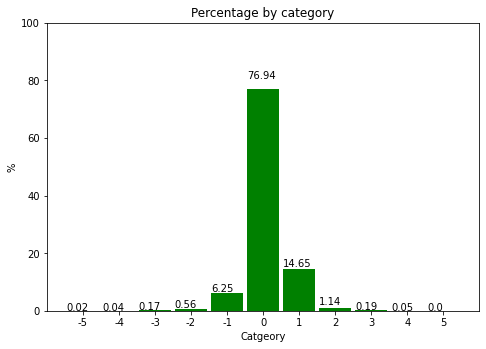

In [8]:
y = [0.02, 0.04, 0.17, 0.56, 6.25, 76.94, 14.65, 1.14, 0.19, 0.05, 0.0]  # percentages
x = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(len(y)), y, align='center', color='g', width=0.9)
plt.xticks(range(len(x)), x)
ax.set_ylim(0,100)
ax.set_title('Percentage by category')
ax.set_xlabel('Catgeory')
ax.set_ylabel('%')

for p in ax.patches:
    ax.annotate(str(p.get_height())[0:5], (p.get_x() * 1.00005, p.get_height() * (1.05 if p.get_height() > 5 else 2)))
plt.show()


# Simple histograms

In [9]:
colors = ['#109618','#3366CC']

for i, color in enumerate(colors):
  df = pd.DataFrame(data=np.random.normal(0,(i+1)**2,10000), columns=['value'])
  fig = px.histogram(df , x='value', color_discrete_sequence=[color], nbins=50)
  fig.update_layout(title_text=f"Histogram Normal(0,{(i+1)**2})",
      yaxis=dict(
          titlefont_size=18,
          tickfont_size=18,
      ),
      xaxis=dict(
      titlefont_size=18,
      tickfont_size=18,
      ),xaxis_showgrid=True, yaxis_showgrid=True)
  fig.update_yaxes(title='count', title_font=dict(size=20))

  fig.update_xaxes(range=[-20, 20])

  fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=0,
            y0=0,
            x1=0,
            y1=1000,
            line=dict(
                color="black",
                width=1,
                dash="dot",

            )))
  fig.show()

# Bars with annotations

In [10]:
df = pd.read_csv('df1.csv')[['sport', 'single / team', '#comments', 'comments lengths','sum comments words']]
display(df)

# records count
sports = ['cricket','rugby-union','formulaone','golf']
lens = [len(df[df['sport'] == sport]) for sport in sports]
colors = ['#B3E2CD', '#66C5CC', '#F4CAE4', '#FE88B1']
fig = go.Figure(data=[go.Bar(
    x=[0, 0.15, 0.3, 0.45],
    y=lens,
    text=lens,
    width=0.1,
    textposition='auto',
    marker_color=colors # marker color can be a single color value or an iterable
)])

xticks = [0, 0.15, 0.3, 0.45]
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = xticks,
        ticktext = sports
    )
)

fig.update_layout(title_text="Amount of records per sport",
    yaxis=dict(
        titlefont_size=12,
        tickfont_size=12,
    ),
    xaxis=dict(
    titlefont_size=12,
    tickfont_size=12,
    ),xaxis_showgrid=True, yaxis_showgrid=True)

fig.update_layout(xaxis_tickangle=-45)

fig.update_layout(width=400, height=400)

fig.show()

,sport,single / team,#comments,comments lengths,sum comments words
0,formulaone,single,299,"[35, 141, 46, 36, 15, 97, 100, 2, 7, 10, 32, 2...",9941
1,formulaone,single,80,"[10, 20, 12, 85, 12, 20, 68, 20, 7, 12, 29, 10...",2873
2,golf,single,327,"[19, 48, 17, 13, 18, 7, 21, 31, 30, 30, 23, 44...",12738
3,golf,single,25,"[22, 83, 3, 319, 3, 61, 29, 39, 25, 95, 118, 3...",1906
4,golf,single,74,"[77, 16, 18, 1, 29, 8, 24, 126, 67, 31, 72, 55...",2343
...,...,...,...,...,...
1995,rugby-union,team,181,"[157, 34, 88, 38, 73, 32, 41, 4, 7, 280, 164, ...",7832
1996,cricket,team,284,"[29, 36, 3, 11, 1, 37, 22, 44, 3, 17, 95, 27, ...",14256
1997,rugby-union,team,491,"[104, 187, 99, 154, 11, 3, 5, 5, 31, 56, 18, 3...",25640
1998,rugby-union,team,439,"[11, 125, 100, 108, 31, 67, 4, 105, 25, 5, 363...",26566


# Multipule distrbutions for several classes


In [11]:
df = pd.read_csv('df2.csv')[['class','prob']]
display(df)

fig = px.histogram(df, x='prob',
                facet_col='class', facet_col_wrap=3)

fig.layout.xaxis = {'anchor': 'y',
              'domain': fig.layout.xaxis['domain'],
              'tickmode': 'array',
              'ticktext': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'tickvals': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'title': {'text': 'prob'}}
fig.layout.xaxis2 = {'anchor': 'y2',
              'domain': fig.layout.xaxis2['domain'],
               'matches': 'x',
              'tickmode': 'array',
              'ticktext': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'tickvals': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'title': {'text': 'prob'}}
fig.layout.xaxis3 = {'anchor': 'y3',
              'domain': fig.layout.xaxis3['domain'],
               'matches': 'x',
              'tickmode': 'array',
              'ticktext': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'tickvals': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'title': {'text': 'prob'}}
fig.layout.yaxis4['title'] =  {'text': 'count'}
fig.layout.yaxis['title'] =  {'text': 'count'}
fig.show()

,class,prob
0,6,0.651931
1,5,0.577744
2,6,0.504580
3,6,0.653251
4,6,0.609243
...,...,...
16213,1,0.555356
16214,1,0.540574
16215,6,0.534161
16216,6,0.473451


# Want a pie?

In [12]:
fig = px.pie(values=[1,9,3,6,5], names=['a', 'b', 'c', 'd', 'e'])
fig.update_layout(margin=dict(t=150, b=150, l=150, r=150))
fig.show()

# Stacked histogram (divided to classes of each bar)

In [13]:
df = pd.read_csv('df3.csv')[['class', 'probs']]
display(df)

division_class = 'class'
values = 'probs'
classes = df[division_class].unique()
colors = ['#42ff77', '#66ff90', '#ff6666', '#ff4242']

# this is the important line, it makes counter for each value in 'values'
# by the different classes in 'division_class'
df = df.groupby([values, division_class])[values].count().unstack(division_class).fillna(0)
df = df.reset_index(level=0)
display(df)

fig = go.Figure()

for k, cls in enumerate(classes):
  fig.add_trace(go.Bar(
      x=list(df[values]),
      y=list(df[cls]),
      name=cls,
      marker_color=colors[k]))

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [round(0.1 * i,1) for i in range(0,11)], 
        ticktext=[str(round(0.1 * i,1)) for i in range(0,11)]
    ))
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=0.5,
            y0=0,
            x1=0.5,
            y1=1000,
            line=dict(
                color="black",
                width=1,
                dash="dot",
            )))

# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

,class,probs
0,d,0.84
1,c,0.72
2,c,0.67
3,b,0.63
4,a,0.56
...,...,...
16213,a,0.55
16214,b,0.41
16215,d,0.59
16216,b,0.51


class,probs,a,b,c,d
0,0.00,2.0,3.0,1.0,0.0
1,0.07,0.0,0.0,1.0,0.0
2,0.09,0.0,0.0,1.0,0.0
3,0.14,0.0,0.0,1.0,0.0
4,0.17,0.0,0.0,1.0,0.0
...,...,...,...,...,...
72,0.96,8.0,2.0,4.0,6.0
73,0.97,2.0,3.0,5.0,1.0
74,0.98,4.0,3.0,1.0,2.0
75,0.99,1.0,2.0,2.0,3.0


# Confidence Intervals

In [14]:
estimators = [5.1, 5.05, 5.6, 8, 4]
all_CIs = [[4,6], [2,5.7], [5,6], [4,12], [3,5.7]]
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']
texts = ['A', 'B', 'C', 'D', 'E']

# plot the data
layout = go.Layout(
  title = f'Point estimators and CIs<br>(vertical line is the point estimator, rectangle is the CI)',
  yaxis = go.layout.YAxis(showticklabels=False))

fig = go.Figure(layout=layout)
# Set axes properties
min_val, max_val = all_CIs[0][0], all_CIs[0][0]
for idx_estimators, estimator in enumerate(estimators):
  beta_value = estimator
  CI_left = all_CIs[idx_estimators][0]
  CI_right = all_CIs[idx_estimators][1]
  
  if CI_left < min_val:
    min_val = CI_left
  if CI_right > max_val:
    max_val = CI_right
  
  # Rectangle
  fig.add_shape(
              type="rect",
              x0=CI_left,
              y0=idx_estimators,
              x1=CI_right,
              y1=idx_estimators+0.5,
              line=dict(color="black", width=1 if idx_estimators != 2 else 3), # for making the 3rd CI rectengle bold
              fillcolor=colors[idx_estimators])
  
  # line
  fig.add_shape(
              type="line",
              x0=beta_value,
              y0=idx_estimators-0.1,
              x1=beta_value,
              y1=idx_estimators+0.6,
              line=dict(color="black"),
              fillcolor=colors[idx_estimators])
  
  # text
  fig.add_trace(go.Scatter(
                x=[(CI_right+CI_left)/2],
                y=[idx_estimators+0.7],
                text=[texts[idx_estimators]],
                mode="text",
                showlegend=False))

dif = max_val-min_val
fig.update_xaxes(range=[min_val-0.1*dif, max_val+0.1*dif], showgrid=False)
fig.update_yaxes(range=[-0.5, len(estimators)])
fig.update_layout(xaxis_showgrid=True, yaxis_showgrid=False)
fig.show()

# 3D interactive plot

In [15]:
df = pd.read_csv('df4.csv')
fig = px.scatter_3d(df, x='std', y='mean', z='max', color='label')
fig.show()

# Trend line for bar chart (histogram)

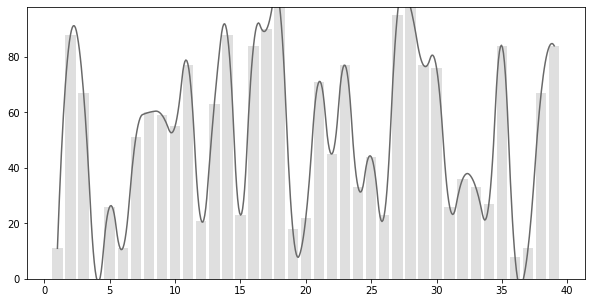

In [16]:
x_values = list(range(1,40))
y_values = np.random.randint(0, 100, len(x_values)) # counts

# interpolate 1-d function
x_interp = np.linspace(x_values[0], x_values[-1], 500)
f = interp1d(x_values, y_values, kind='quadratic')
y_interp = f(x_interp)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x_interp, y_interp, zorder=2, color='dimgray')
ax.bar(x_values, y_values, zorder=1, alpha=0.5, color="silver")

plt.ylim((min(y_values), max(y_values)))
plt.show()

# Bar plots with categories and groups

In [17]:
x = ['GRP 1', 'GRP 2', 'GRP 3']

fig = go.Figure(
    data=[
        go.Bar(
            name="A",
            x=x,
            y=[1, 2, 3], text=['1M', '2M', '3M'], textposition='auto',
            offsetgroup=1, marker_color='plum'
        ),
        go.Bar(
            name="B",
            x=x,
            y=[4, 5, 6], text=['4M', '5M', '6M'], textposition='auto',
            offsetgroup=2, marker_color='cornflowerblue'
        ),
        go.Bar(
            name="C",
            x=x,
            y=[7, 8, 9], text=['7M', '8M', '9M'], textposition='auto',
            offsetgroup=3, marker_color='salmon'
        )],
    layout=go.Layout(
        title="Product purchases per group and product category",
        yaxis_title="# Purchases"))

fig.update_traces(textposition='auto', textfont={'size': 12})
# set legend font size and position
fig.update_layout(legend=dict(font={'size': 12}, yanchor="top", y=0.99, xanchor="left", x=0.01), font=dict(size=13),
                  height=600, width=1200)
fig.show()

# Would you like another pie?

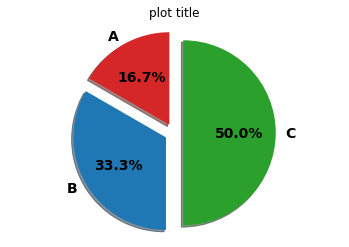

In [18]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise
labels = ['A', 'B', 'C']
sizes = [1, 2, 3]
explode = (0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=['tab:red', 'tab:blue', 'tab:green'],
        shadow=True, startangle=90, textprops={'fontsize': 14, 'weight': 'bold'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('plot title')

plt.show()

# Percent by category

In [19]:
data = [['Tom', 'a', 0.5], ['Nick', 'a', 0.4],
        ['Tom', 'b', 0.3], ['Nick', 'b', 0.5],
        ['Tom', 'c', 0.2], ['Nick', 'c', 0.1]]

df = pd.DataFrame(data, columns=['name', 'category', 'percent'])
fig = px.bar(df, x="name", y="percent", color="category", title="Percentage by category",
             color_discrete_map={'a': 'salmon', 'b': 'royalblue', 'c': 'plum'})

fig.add_annotation(
    x=0,
    y=1.05,
    text='Text 1', )
fig.add_annotation(
    x=1,
    y=1.05,
    text='Text 2')

fig.update_annotations(dict(xref="x", yref="y", showarrow=True, arrowhead=2, font=dict(size=15)))
fig.update_layout(height=600, width=800)
fig.show()

# 2 Y-Axis

In [20]:
data_1 = [['2020-05-01', 0.5], ['2020-06-01', 0.6], ['2020-07-01', 0.7],
          ['2020-08-01', 0.8], ['2020-09-01', 0.9], ['2020-10-01', 1]]
df_1 = pd.DataFrame(data_1, columns=['date', 'rate'])

data_2 = [['2020-05-01', 100], ['2020-06-01', 90], ['2020-07-01', 80],
          ['2020-08-01', 70], ['2020-09-01', 60], ['2020-10-01', 50]]
df_2 = pd.DataFrame(data_2, columns=['date', 'rate'])

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_scatter(x=df_1['date'], y=df_1['rate'], name='first axis',
                showlegend=True, secondary_y=False, marker=dict(color='royalblue'))

fig.add_scatter(x=df_2['date'], y=df_2['rate'], name='second axis',
                showlegend=True, secondary_y=True, marker=dict(color='salmon'))

fig.update_yaxes(title_text="<b>primary</b> axis", secondary_y=False, color='royalblue')
fig.update_yaxes(title_text="<b>secondary</b> axis", secondary_y=True, color='salmon')
fig.show()

# Venn diagram

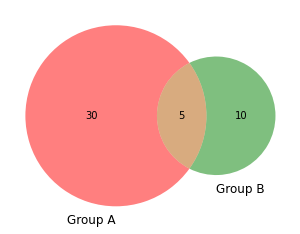

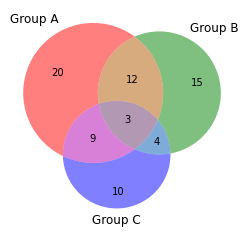

In [21]:
venn2(subsets=(30, 10, 5), set_labels=('Group A', 'Group B'), set_colors=('r', 'g'), alpha=0.5)
plt.show()

venn3(subsets = (20, 15, 12, 10, 9, 4, 3), set_labels = ('Group A', 'Group B', 'Group C'), alpha = 0.5)
plt.show()